In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, json

import pandas as pd
import numpy as np

#sys.path.insert(0, '/mnt/d/projects/bassline_transcription')
sys.path.insert(0, '/scratch/users/udemir15/ELEC491/bassline_transcription')

import dataset
import utilities
from plotting.dataset_plots import *

## 1) Initialize

In [2]:
directories = utilities.get_directories('../data/directories.json')
_, track_dicts, track_titles = utilities.read_metadata(directories, 'TechHouse_total_track_dicts.json')

## 2) Read the Midi Sequences

In [3]:
df_midi_sequences = pd.read_csv('../data/metadata/midi_sequences.csv')
print('Total number of midi sequences: {}'.format(df_midi_sequences.shape[0]))
df_midi_sequences.head()

Total number of midi sequences: 8896


,Title,Key,Scale,0,1,2,3,4,5,6,...,502,503,504,505,506,507,508,509,510,511
0,No Good For Me (Original Mix),E,min,0,0,0,0,0,0,0,...,40,40,40,40,40,40,40,40,40,40
1,"Huxley, Hauswerks - On Your Knees",C#,min,0,0,0,0,0,0,0,...,0,0,0,0,0,0,32,32,32,32
2,RAMA7 - Smiling Faces (Original Mix),A#,min,0,0,0,0,0,34,34,...,32,32,32,32,32,32,32,32,32,32
3,"Reza, Tom Chubb - Everything About You (Origin...",E,min,0,0,0,0,28,28,28,...,31,31,31,31,31,31,31,31,31,31
4,Mind Body & Soul (Original Mix),G#,min,0,0,0,0,0,0,0,...,0,39,39,39,39,39,39,0,0,0


Original min: 23, max: 48
Transposed min: 13, max: 48


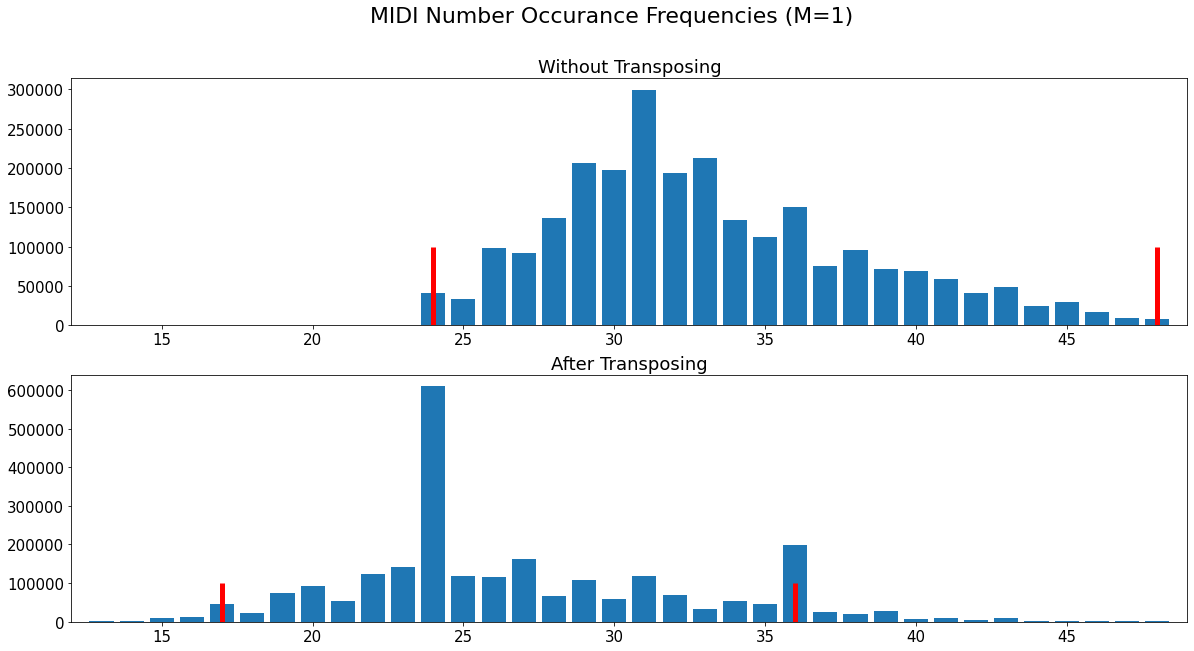

In [4]:
note_counter, note_counter_T = dataset.count_notes_with_transposing(df_midi_sequences)
plot_note_occurances_with_transposing(note_counter, note_counter_T, 1)

## 3) Encoding

In [5]:
with open('../data/metadata/bad_beat_f0_titles.txt', 'r') as infile:
    excluded_titles = infile.read().split('\n')
print('There are {} tracks to exclude.'.format(len(excluded_titles)))

There are 4420 tracks to exclude.


In [102]:
M = 8
MIN_NOTE = 16
MAX_NOTE = 39
sustain_code = 100
df_codes_min, df_codes_maj = dataset.create_datasets(df_midi_sequences, excluded_titles,
                                                     track_dicts, M,
                                                     MIN_NOTE=MIN_NOTE, MAX_NOTE=MAX_NOTE,
                                                     sustain_code=sustain_code)

Number of total representations: 4542

Tokens:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

min    4055
maj     487
Name: Scale, dtype: int64


note_counter = dataset.count_notes(df_codes_min)
plot_note_occurances(note_counter, M)

### Export Dataframes

dataset_name = 'TechHouse_Bassline_Representations'
representation_path = os.path.join('..','data','datasets', 'new', '[{}, {}]'.format(MIN_NOTE,MAX_NOTE),
                'two_octaves', 'no_sus')
os.makedirs(representation_path, exist_ok=True)

min_title = dataset_name+'_min_M{}.csv'.format(M)
maj_title = dataset_name+'_maj_M{}.csv'.format(M)
min_dir = os.path.join(representation_path, min_title)
maj_dir = os.path.join(representation_path, maj_title)
df_codes_min.to_csv(min_dir, index=False, header=False)
df_codes_maj.to_csv(maj_dir, index=False, header=False)

## 4) Single Octave Dataset

In [10]:
df_single_octave_min = dataset.create_single_octave_dataset(df_codes_min, 24-(MIN_NOTE-1), sustain_code=25)
df_single_octave_maj = dataset.create_single_octave_dataset(df_codes_maj, 24-(MIN_NOTE-1), sustain_code=25)
df_single_octave_min.head()
print('Single octave dataset sizes\nMinor: {}\nMajor: {}'.format(df_single_octave_min.shape[0], df_single_octave_maj.shape[0]))

Single octave dataset sizes
Minor: 4055
Major: 487


### Export Dataframes

In [52]:
dataset_name = 'TechHouse_Bassline_Representations'
representation_path = os.path.join('..','data','datasets', 'new', '[{}, {}]'.format(MIN_NOTE,MAX_NOTE),
                                   'single_octave','sus')
os.makedirs(representation_path, exist_ok=True)

min_title = dataset_name+'_min_M{}.csv'.format(M)
maj_title = dataset_name+'_maj_M{}.csv'.format(M)
min_dir = os.path.join(representation_path, min_title)
maj_dir = os.path.join(representation_path, maj_title)
df_single_octave_min.to_csv(min_dir, index=False, header=False)
df_single_octave_maj.to_csv(maj_dir, index=False, header=False)

## 5) Groove Dataset

In [103]:
sustain_code = 25
df_groove_min = dataset.create_groove_dataset(df_codes_min, sustain_code=sustain_code)
df_groove_maj = dataset.create_groove_dataset(df_codes_maj, sustain_code=sustain_code)

Number of total representations: 4055

Tokens:
[0 1 2]

Number of total representations: 487

Tokens:
[0 1 2]



### Export Dataframes

In [104]:
dataset_name = 'TechHouse_Bassline_Representations'
representation_path = os.path.join('..','data','datasets', 'new', '[{}, {}]'.format(MIN_NOTE,MAX_NOTE),
                                   'two_octaves','groove','sus')
os.makedirs(representation_path, exist_ok=True)

min_title = dataset_name+'_min_M{}.csv'.format(M)
maj_title = dataset_name+'_maj_M{}.csv'.format(M)
min_dir = os.path.join(representation_path, min_title)
maj_dir = os.path.join(representation_path, maj_title)
df_single_octave_min.to_csv(min_dir, index=False, header=False)
df_single_octave_maj.to_csv(maj_dir, index=False, header=False)